# EDA
El analisis exploratorio de los datos incluye el siguiente analisis de los datos que se verán reflejados en los graficos. 

Antes de realizar el EDA vamos a explorar los datos, analizar las columnas y ver las diversas relaciones que se pueden obtener para analizar los datos. 

In [1]:
# Importamos todas las librerías que vamos a usar.
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

# Cargamos el dataset para analizar su estructura y contenido.
merge = pd.read_csv("MergeLimpio.csv")



C:\Users\jerom\AppData\Local\Temp\ipykernel_19524\3414349208.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Mostramos las primeras filas y el resumen de las columnas para entender mejor la estructura de los datos
merge.head(), merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45451 entries, 0 to 45450
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                45451 non-null  float64
 1   genres                45451 non-null  object 
 2   id                    45451 non-null  int64  
 3   popularity            45451 non-null  float64
 4   production_companies  45451 non-null  object 
 5   release_date          45451 non-null  object 
 6   revenue               45451 non-null  float64
 7   runtime               45205 non-null  float64
 8   title                 45451 non-null  object 
 9   vote_average          45451 non-null  float64
 10  vote_count            45451 non-null  float64
 11  release_year          45451 non-null  float64
 12  return                45451 non-null  float64
 13  actors                45451 non-null  object 
 14  directors             45451 non-null  object 
dtypes: float64(8), int6

(       budget                              genres     id  popularity  \
 0  30000000.0   ['Animation', 'Comedy', 'Family']    862   21.946943   
 1  65000000.0  ['Adventure', 'Fantasy', 'Family']   8844   17.015539   
 2         0.0               ['Romance', 'Comedy']  15602   11.712900   
 3  16000000.0      ['Comedy', 'Drama', 'Romance']  31357    3.859495   
 4         0.0                          ['Comedy']  11862    8.387519   
 
                                 production_companies release_date  \
 0                        ['Pixar Animation Studios']   1995-10-30   
 1  ['TriStar Pictures', 'Teitler Film', 'Intersco...   1995-12-15   
 2                 ['Warner Bros.', 'Lancaster Gate']   1995-12-22   
 3         ['Twentieth Century Fox Film Corporation']   1995-12-22   
 4   ['Sandollar Productions', 'Touchstone Pictures']   1995-02-10   
 
        revenue  runtime                        title  vote_average  \
 0  373554033.0     81.0                    Toy Story           7.7

Habiendo analizado el data set sacamos las siguientes conclusiones para el análisis: 

1. Distribución de presupuesto, ingresos y retorno: Examinar la distribución de las columnas budget, revenue y return mediante histogramas para identificar rangos comunes y posibles valores atípicos.

2. Correlación entre presupuesto, ingresos y popularidad: Realizar una matriz de correlación entre budget, revenue, popularity, vote_count, y vote_average para encontrar relaciones entre estos aspectos financieros y la recepción de la audiencia.

3. Relación entre duración y calificación promedio: Crear un gráfico de dispersión entre runtime y vote_average para ver si existe alguna tendencia entre la duración de la película y la calificación.

4. Análisis de popularidad por año de lanzamiento: Examinar la evolución de la popularidad promedio de las películas a lo largo de los años utilizando release_year y popularity para observar tendencias temporales.

5. Ranking de los géneros más comunes: Generar un ranking de géneros de películas en genres para identificar cuáles son los más populares en el dataset.

6. Comparación entre popularidad y votos: Analizar la relación entre popularity y vote_count para identificar si las películas con mayor popularidad también tienden a tener una mayor cantidad de votos, lo que podría sugerir una correlación entre interés y participación de la audiencia.

7. Ingresos promedio por compañía de producción: Evaluar el rendimiento promedio en ingresos de las principales compañías de producción (production_companies) para determinar cuáles tienden a producir películas más exitosas.

8. Rentabilidad promedio por director: Generar un ranking de rentabilidad media (return) por director (directors) para identificar a los más rentables en el dataset.

9. Nube de palabras a partir de los títulos de las películas; Generar una nube de palabras para ver que títulos podría llevar la pelicula e intuir el genero popular. 

10. Análisis de actores más frecuentes: Generar un conteo de los actores más comunes en la base de datos para ver si ciertos actores aparecen repetidamente y posiblemente influencian la popularidad o ingresos de las películas en las que participan.

A continuación se desarrollará cada uno de los items y se realizará el insight correspondiente. 
​

1. Distribución de presupuesto, ingresos y retorno: vamos a examinar la distribución de las columnas budget, revenue y return mediante histogramas para identificar rangos comunes. 

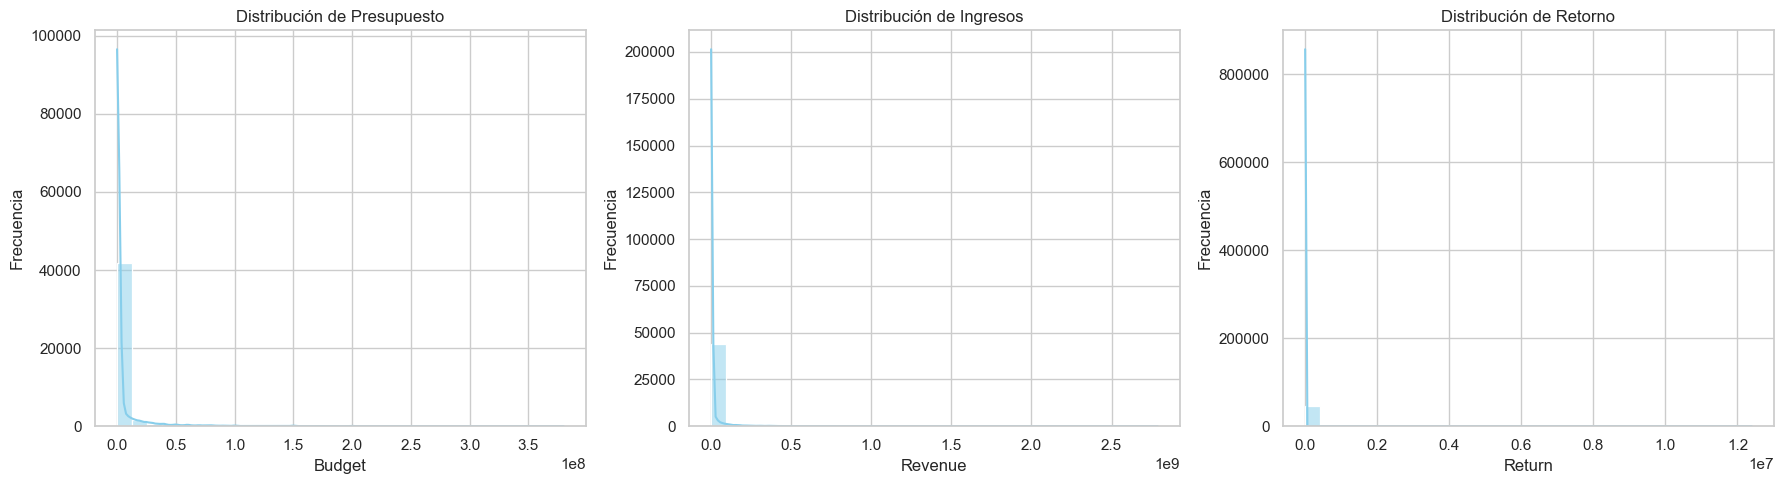

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilo para seaborn
sns.set(style="whitegrid")

# Histogramas de distribución
fig, axs = plt.subplots(1, 3, figsize=(18, 5))
columns = ['budget', 'revenue', 'return']
titles = ['Distribución de Presupuesto', 'Distribución de Ingresos', 'Distribución de Retorno']

for ax, col, title in zip(axs, columns, titles):
    sns.histplot(merge[col], bins=30, kde=True, ax=ax, color='skyblue')
    ax.set_title(title)
    ax.set_xlabel(col.capitalize())
    ax.set_ylabel("Frecuencia")

plt.tight_layout()
plt.show()


Analisis: En primer lugar los siguientes graficos muestran valores atipicos significativos. Se puede observar una consentración en rangos bajos de presupuesto y retorno. También los valores atipicos en ingresos pueden indicar exitos exepcionales que no son comunes. En resumen peliculas con poco mucho presupuesto no garantizan un gran retorno. 

2. Correlación entre presupuesto, ingresos y popularidad: Voy a hacer una matriz de correlación entre budget, revenue, popularity, vote_count, y vote_average para encontrar relaciones entre estos aspectos financieros y la recepción de la audiencia.

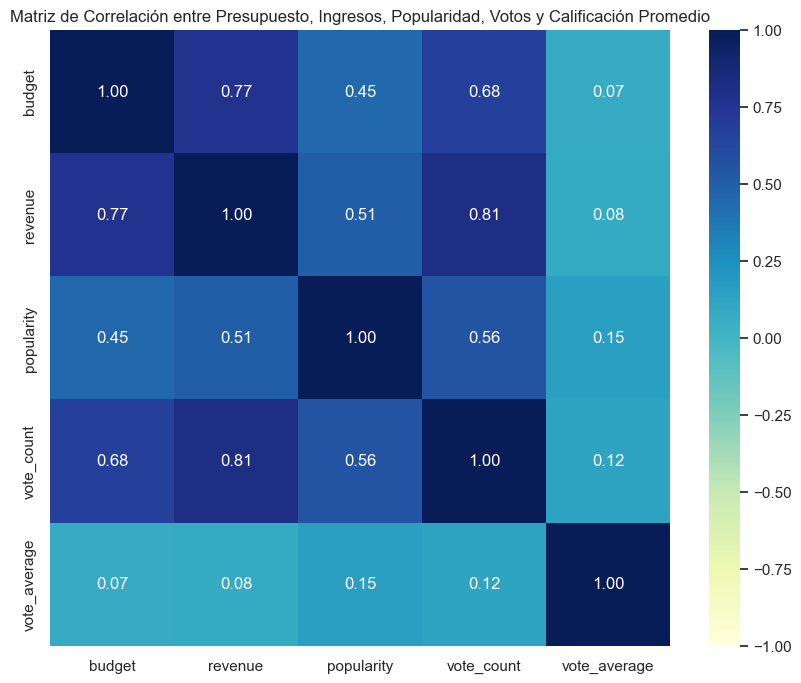

In [4]:
# Matriz de correlación
correlation_data = merge[['budget', 'revenue', 'popularity', 'vote_count', 'vote_average']].corr()

# Matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_data, annot=True, cmap="YlGnBu", fmt=".2f", vmin=-1, vmax=1)
plt.title("Matriz de Correlación entre Presupuesto, Ingresos, Popularidad, Votos y Calificación Promedio")
plt.show()


Analisis. La siguiente matriz muestra que la correlación entre presupuesto e ingresos es alta pero no garantiza popularidad y votos. En resumen las peliculas populares tienden a atraer más al publico. Esto tiene tambien su correlación con el la nube de palabras y el genero popular que veremos más adelante, en cuanto que las palabras más frecuentes y le genero popular muestran donde y en qué invertir más.

3. Relación entre duración y calificación promedio: Voy a crear un gráfico de dispersión entre runtime y vote_average para ver si existe alguna tendencia entre la duración de la película y la calificación.


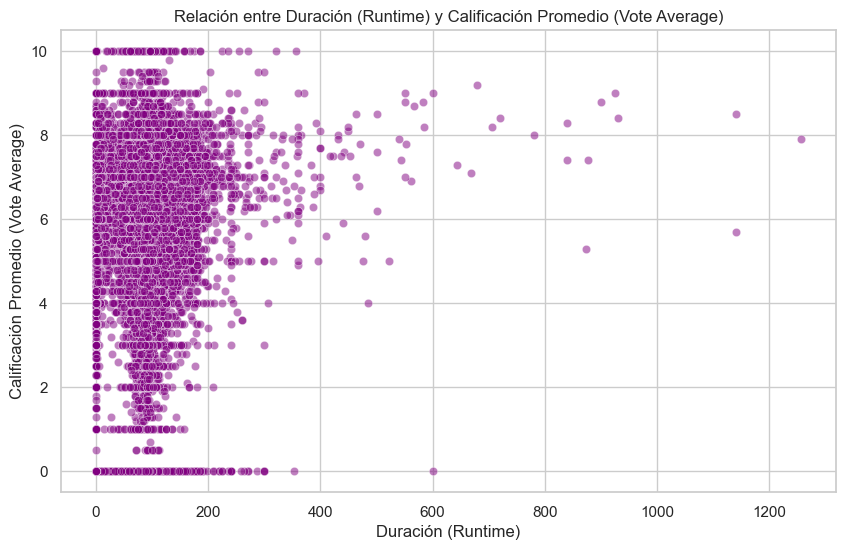

In [5]:
# Gráfico de dispersión entre duración y calificación promedio
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merge, x='runtime', y='vote_average', alpha=0.5, color="purple")
plt.title("Relación entre Duración (Runtime) y Calificación Promedio (Vote Average)")
plt.xlabel("Duración (Runtime)")
plt.ylabel("Calificación Promedio (Vote Average)")
plt.show()


Analisis: La duración de la pelicua tiene poco impacto en la calificación e impacto en el publico. Este analisis parece no ser tan relevante. 

4. Análisis de popularidad por año de lanzamiento: Voy examinar la evolución de la popularidad promedio de las películas a lo largo de los años utilizando release_year y popularity para observar tendencias en el tiempo.

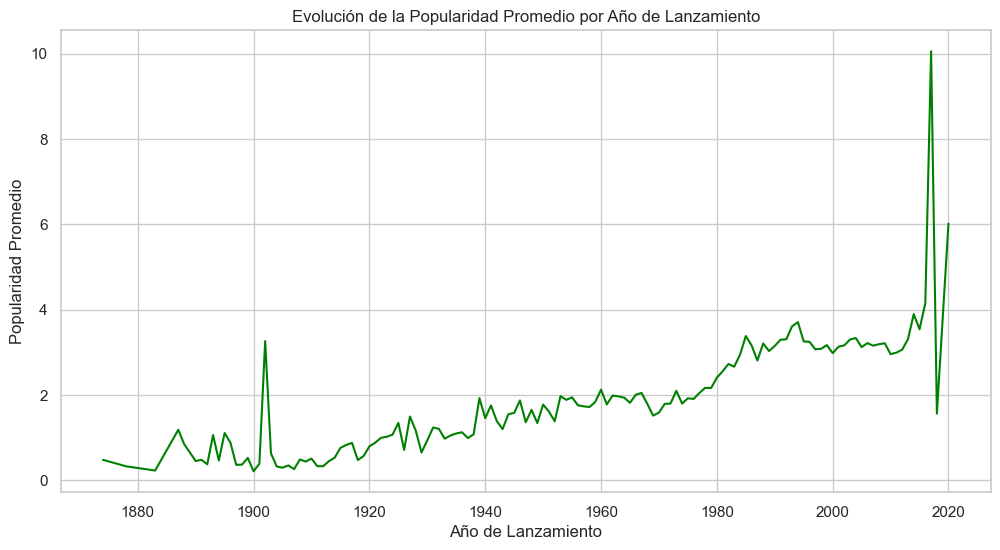

In [6]:
# Popularidad promedio por año de lanzamiento
popularity_by_year = merge.groupby('release_year')['popularity'].mean()

plt.figure(figsize=(12, 6))
sns.lineplot(x=popularity_by_year.index, y=popularity_by_year.values, color='green')
plt.title("Evolución de la Popularidad Promedio por Año de Lanzamiento")
plt.xlabel("Año de Lanzamiento")
plt.ylabel("Popularidad Promedio")
plt.show()


Analisis: A lo largo de la historia se puede ver un aumento en la popularidad. Aqui puedo detecatar tres etapas donde se ve un aumento significativo: la creación del cine (genesis); las peliculas a color (1970), y las plataformas digitales (2015). La exploción exponencial se ve reflejada en esta ultima etapa.  Tambien se puede observar una grieta debido al confinamiento (2020). La popularidad va a estar atada a los nuevos medios de transmición de las filmaciones. 

5. Ranking de los géneros más comunes: Voy generar un ranking de géneros de películas en genres para identificar cuáles son los más populares en el dataset.

C:\Users\jerom\AppData\Local\Temp\ipykernel_19524\275122957.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=genres_df.head(10), x='Count', y='Genre', palette="viridis")


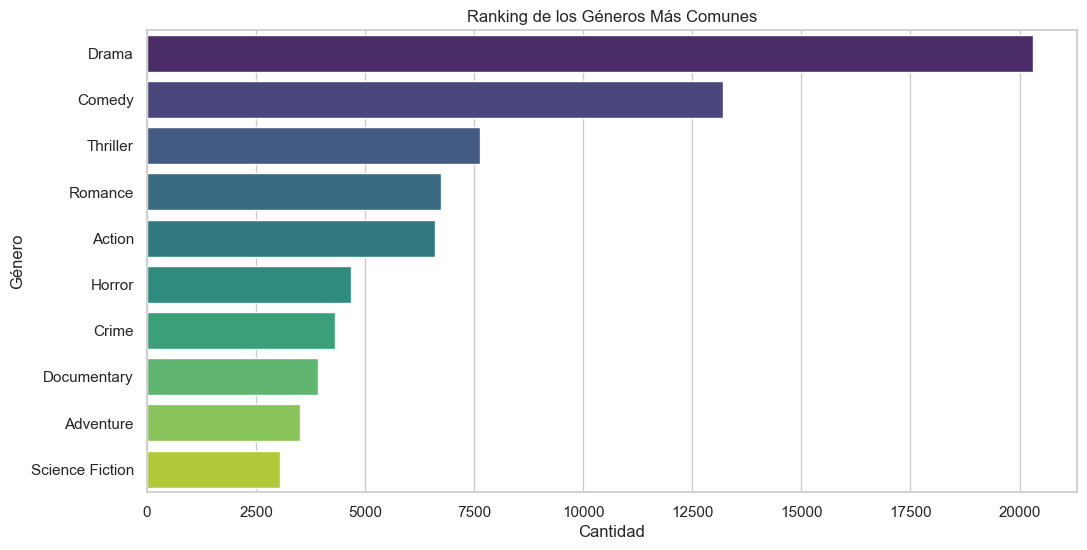

In [7]:
from collections import Counter

# Extraer y contar géneros
genres = merge['genres'].str.strip("[]").str.replace("'", "").str.split(", ")
all_genres = [genre for sublist in genres.dropna() for genre in sublist]
genre_counts = Counter(all_genres)

# Mostrar los géneros más comunes
genres_df = pd.DataFrame(genre_counts.items(), columns=['Genre', 'Count']).sort_values(by='Count', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=genres_df.head(10), x='Count', y='Genre', palette="viridis")
plt.title("Ranking de los Géneros Más Comunes")
plt.xlabel("Cantidad")
plt.ylabel("Género")
plt.show()


Analisis: Este grafico es interesante porque muestra qué generos suelen ser más comúnes. Este ranking muetra la demanda y por ende pueden ser una opción segura de inversión. 

6. Comparación entre popularidad y votos: Voy a analizar la relación entre las columnas popularity y vote_count para identificar si las películas con mayor popularidad también tienden a tener una mayor cantidad de votos, lo que podría sugerir una correlación entre interés y participación de la audiencia.

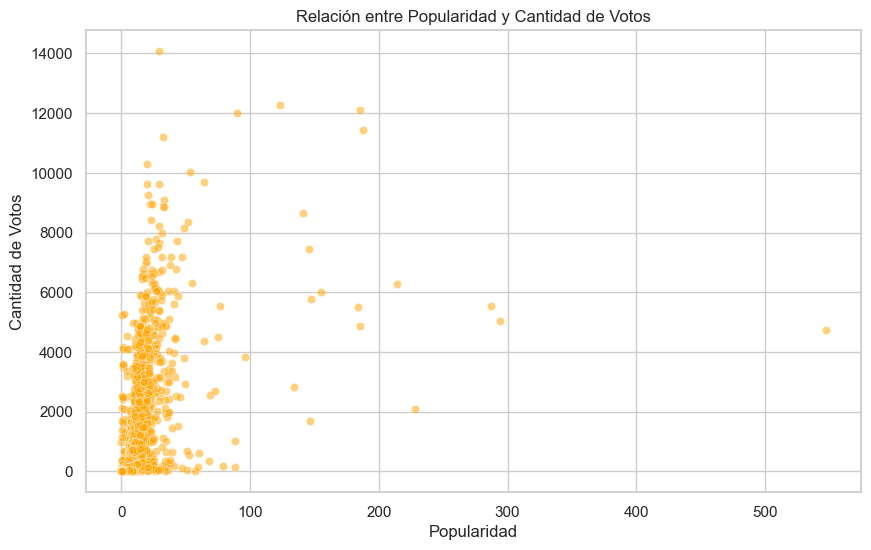

In [8]:
# Gráfico de dispersión entre popularidad y cantidad de votos
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merge, x='popularity', y='vote_count', alpha=0.5, color="orange")
plt.title("Relación entre Popularidad y Cantidad de Votos")
plt.xlabel("Popularidad")
plt.ylabel("Cantidad de Votos")
plt.show()


Analisis:Este grafico nos muestra una relación positiva entre populatidad y cantidad de votos. Las peliculas populares logran mayor cantidad de votos. 

7. Ingresos promedio por compañía de producción: Voy a evaluar el rendimiento promedio en ingresos de las principales compañías de producción (production_companies) para determinar cuáles tienden a producir películas más exitosas.

C:\Users\jerom\AppData\Local\Temp\ipykernel_19524\649298721.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_companies.values, y=top_companies.index, palette="coolwarm")


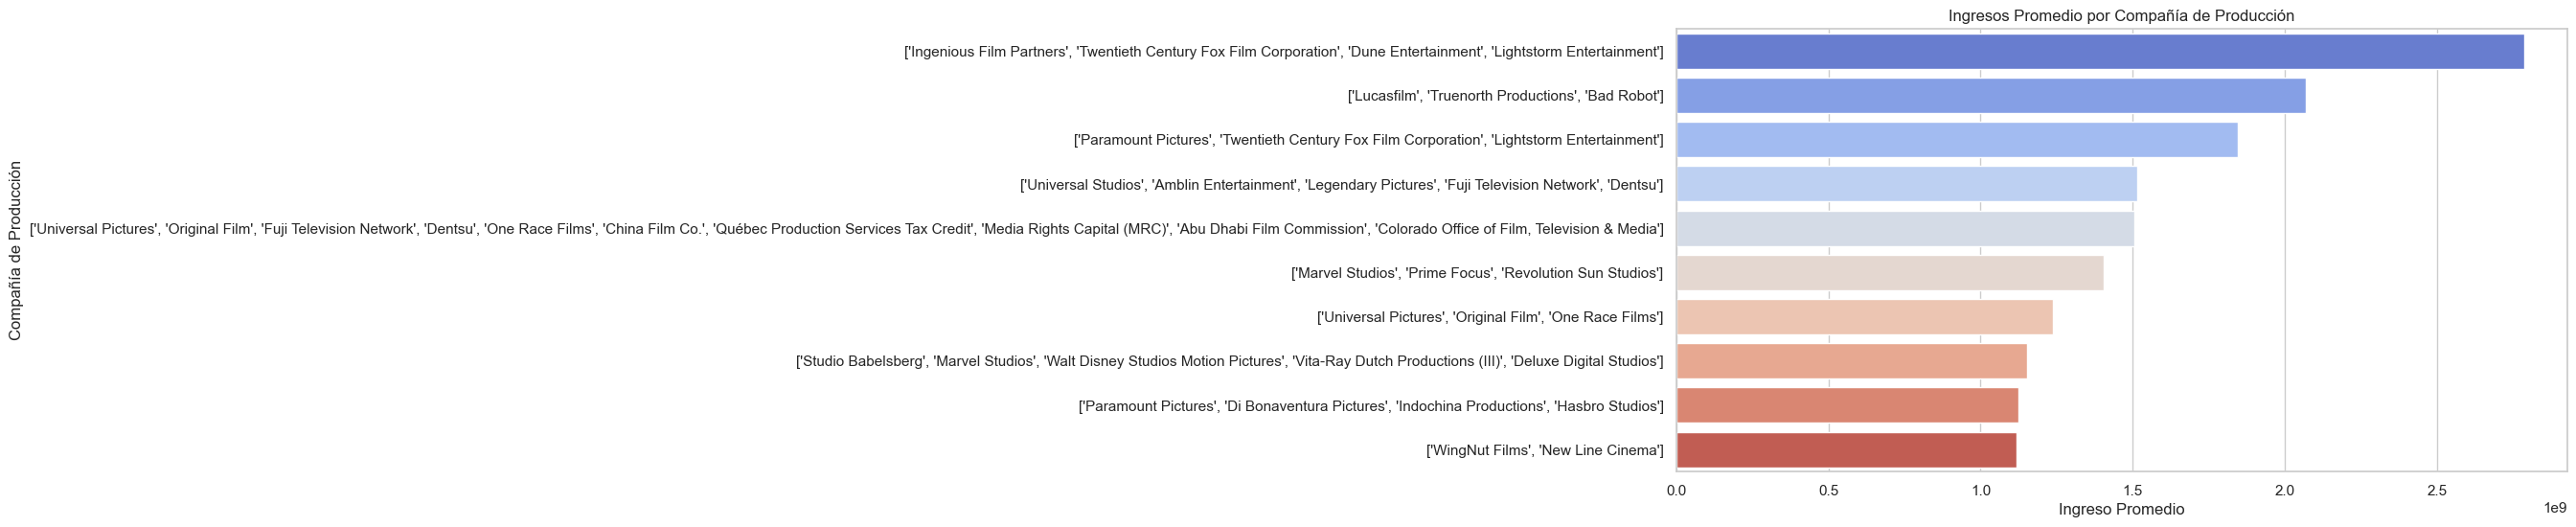

In [9]:
# Ingresos promedio por compañía de producción
companies = merge['production_companies'].str.strip("[]").str.replace("'", "").str.split(", ")
all_companies = [company for sublist in companies.dropna() for company in sublist]
company_revenue = merge.explode('production_companies').groupby('production_companies')['revenue'].mean()

# Se grafican las 10 compañías más exitosas en términos de ingresos promedio
top_companies = company_revenue.nlargest(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_companies.values, y=top_companies.index, palette="coolwarm")
plt.title("Ingresos Promedio por Compañía de Producción")
plt.xlabel("Ingreso Promedio")
plt.ylabel("Compañía de Producción")
plt.show()


Analisis: Las companias con mayor ingresos son las que podrían ser buenos socios o mentores para los futuros proyectos. 

8. Rentabilidad promedio por director: Voy a generar un ranking de rentabilidad media (return) por director (directors) para identificar a los más rentables en el dataset.

C:\Users\jerom\AppData\Local\Temp\ipykernel_19524\524501941.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_directors.values, y=top_directors.index, palette="plasma")


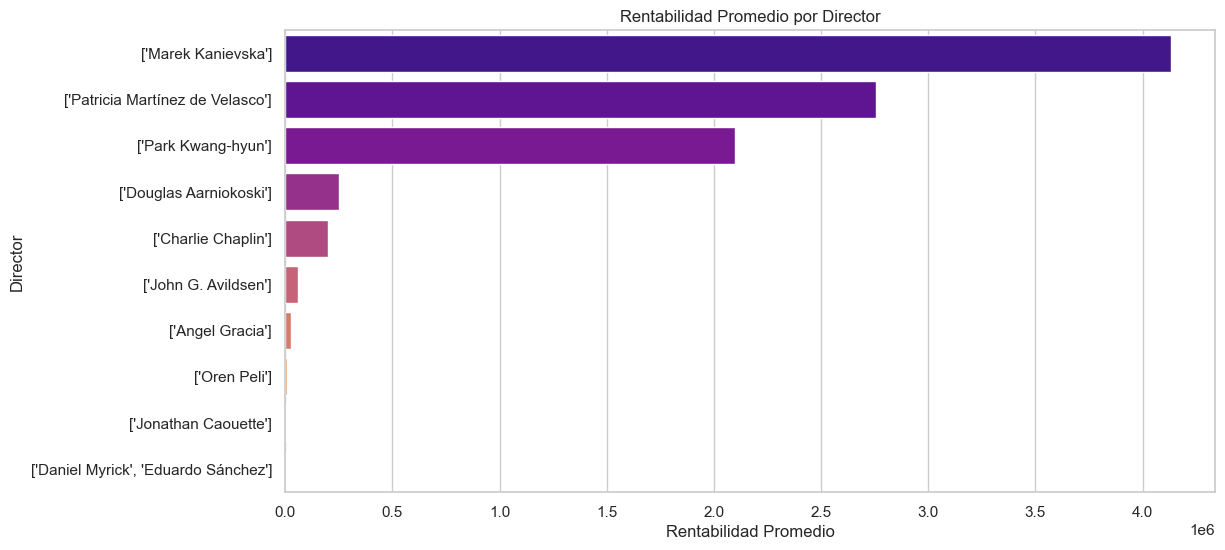

In [10]:
# Rentabilidad promedio por director
director_return = merge.explode('directors').groupby('directors')['return'].mean()

# Se grafican los 10 directores más rentables
top_directors = director_return.nlargest(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_directors.values, y=top_directors.index, palette="plasma")
plt.title("Rentabilidad Promedio por Director")
plt.xlabel("Rentabilidad Promedio")
plt.ylabel("Director")
plt.show()


Analisis: Analisis: Este gráfico nos muestra e identifica cuál director sería una mejor opción para garantizar una retabilidad mayor. Quizas más que contrar al director se podría estudiar sus técnicas y guines para replicarlo. 

9. Palabras frecuentes y Nube de palabras a partir de los títulos de las películas. Voy a realizar una nube de palabras para ver qué palabras son las qué más aparecen en los titulos de las paliculas (title). 

Text(0.5, 1.0, 'Nube de Palabras - Títulos de Películas')

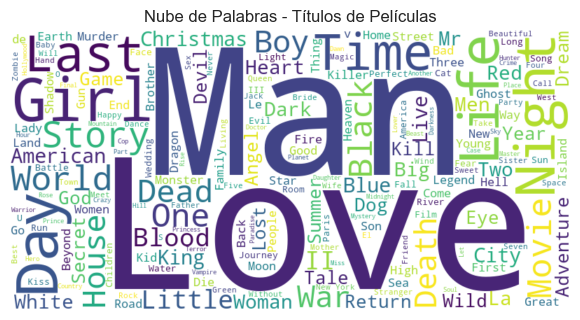

In [11]:


# Configuramos el estilo visual para las gráficas
sns.set(style="whitegrid")

# 1. Creamos la nube de palabras a partir de los títulos de las películas
title_text = ' '.join(merge['title'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(title_text)

# 2. Gráfico de distribución del promedio de votación
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras - Títulos de Películas')



Analisis: Estas son las palabras que más aparecen en los títulos de las peliculas. ESto podría servir para decir qué nombre de peliculas son más populares, teniendo en cuenta que el título de la pelicula es el primer filtro para la audiencia. Además, estas palabras podrían mostrar una cierta relación al género, dando a entender que el genero romantico o drama como los más populares. 

10. Análisis de actores más frecuentes: Voy a generar un ranking (Top 10) sencillo de los actores más comunes en la base de datos para ver si ciertos actores aparecen repetidamente y posiblemente influencian la popularidad o ingresos de las películas en las que participan.

In [12]:

# Contar apariciones de actores
actors = merge['actors'].str.strip("[]").str.replace("'", "").str.split(", ")
all_actors = [actor for sublist in actors.dropna() for actor in sublist]
actor_counts = Counter(all_actors)

# Se convierte el contador a un DataFrame y ordenar por frecuencia
actors_df = pd.DataFrame(actor_counts.items(), columns=['Actor', 'Count']).sort_values(by='Count', ascending=False)

# Se indentifican los dos primeros actores y filtrarlos
top_actors = actors_df['Actor'].head(2).values
filtered_actors_df = actors_df[~actors_df['Actor'].isin(top_actors)]

# Mostrar los 10 actores más frecuentes después de filtrar los dos primeros (los dos primeros son datos anómalos)
filtered_actors_df.head(10)



,Actor,Count
9410,Bess Flowers,241
8300,Christopher Lee,148
11413,John Wayne,125
2388,Samuel L. Jackson,123
15210,Michael Caine,110
5162,Gérard Depardieu,110
10893,John Carradine,109
3077,Donald Sutherland,109
1706,Jackie Chan,108
260,Frank Welker,107


Analisis: Esta tabla nos muestra la influencia de ciertos actores que van a determinar la popularidad de las peliculas. 